# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [37]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [38]:
data = pd.read_csv('../lab-supervised-classification-master/data_all.zip',nrows=10000)
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
imagenes=data.e.unique()
list_imagenes=imagenes.tolist()
list_imagenes.sort()
print(list_imagenes)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0]


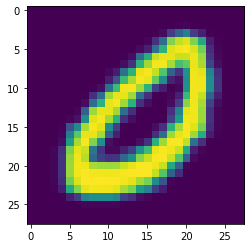

In [40]:
X=data.drop(columns="e")
y=data.e

impresion=X.iloc[1,:].to_numpy().reshape(28,28)
plt.imshow(impresion);

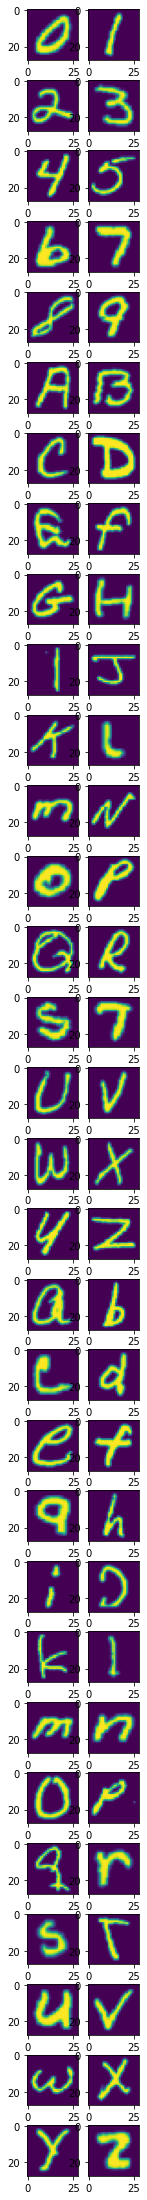

In [41]:
fig=plt.figure(figsize=(2,40))
columns=2
rows=31
for i in range(1,columns*rows+1):
    img=data[data.e==(i-1)].iloc[0,1:].to_numpy().reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [42]:
X_up=data[(data.e>=10)&(data.e<=36)].drop(columns="e")
y_up=data[(data.e>=10)&(data.e<=36)].e

X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_up,y_up,test_size=0.2)

In [43]:
SVC=SVC()

In [44]:
SVC.fit(X_up_train,y_up_train)
y_up_pred=SVC.predict(X_up_test)

In [45]:
precision_score(y_up_test,y_up_pred,average=None)

array([0.83333333, 0.85714286, 0.85714286, 0.75      , 0.93333333,
       0.82857143, 1.        , 1.        , 0.76595745, 0.75      ,
       1.        , 1.        , 0.88888889, 0.58333333, 0.84615385,
       0.875     , 0.8       , 0.76470588, 0.93846154, 1.        ,
       0.8       , 0.625     , 0.9       , 0.66666667, 0.63157895,
       1.        , 0.82758621])

In [46]:
recall_score(y_up_test,y_up_pred,average=None)

array([0.75      , 0.85714286, 0.7826087 , 0.3       , 0.77777778,
       0.87878788, 0.375     , 0.66666667, 0.97297297, 0.75      ,
       0.4       , 0.93333333, 0.88888889, 0.77777778, 0.95652174,
       0.93333333, 0.57142857, 0.72222222, 0.92424242, 0.95833333,
       0.96969697, 0.41666667, 0.69230769, 0.4       , 0.85714286,
       0.66666667, 0.88888889])

In [47]:
f1_score(y_up_test,y_up_pred,average=None)

array([0.78947368, 0.85714286, 0.81818182, 0.42857143, 0.84848485,
       0.85294118, 0.54545455, 0.8       , 0.85714286, 0.75      ,
       0.57142857, 0.96551724, 0.88888889, 0.66666667, 0.89795918,
       0.90322581, 0.66666667, 0.74285714, 0.93129771, 0.9787234 ,
       0.87671233, 0.5       , 0.7826087 , 0.5       , 0.72727273,
       0.8       , 0.85714286])

In [48]:
SVC.score(X=X_up_test,y=y_up_test)

0.8369175627240143

In [49]:
DTC=DecisionTreeClassifier()
DTC.fit(X_up_train, y_up_train)

DecisionTreeClassifier()

In [50]:
y_up_pred=DTC.predict(X_up_test)

In [51]:
precision_score(y_up_test,y_up_pred,average=None)

array([0.46153846, 0.2       , 0.42857143, 0.16666667, 0.45      ,
       0.51724138, 0.25      , 0.        , 0.625     , 0.15384615,
       0.33333333, 0.6       , 0.58823529, 0.39130435, 0.76119403,
       0.56521739, 0.57142857, 0.375     , 0.76666667, 0.58823529,
       0.8       , 0.30769231, 0.4       , 0.4       , 0.36842105,
       0.        , 0.44827586])

In [52]:
recall_score(y_up_test,y_up_pred, average=None)

array([0.3       , 0.28571429, 0.39130435, 0.2       , 0.5       ,
       0.45454545, 0.125     , 0.        , 0.81081081, 0.25      ,
       0.6       , 0.4       , 0.55555556, 0.5       , 0.73913043,
       0.43333333, 0.57142857, 0.33333333, 0.6969697 , 0.83333333,
       0.72727273, 0.33333333, 0.46153846, 0.2       , 0.5       ,
       0.        , 0.48148148])

In [53]:
f1_score(y_up_test,y_up_pred,average=None)

array([0.36363636, 0.23529412, 0.40909091, 0.18181818, 0.47368421,
       0.48387097, 0.16666667, 0.        , 0.70588235, 0.19047619,
       0.42857143, 0.48      , 0.57142857, 0.43902439, 0.75      ,
       0.49056604, 0.57142857, 0.35294118, 0.73015873, 0.68965517,
       0.76190476, 0.32      , 0.42857143, 0.26666667, 0.42424242,
       0.        , 0.46428571])

In [54]:
DTC.score(X=X_up_test,y=y_up_test)

0.5376344086021505

In [55]:
RFC=RandomForestClassifier()
RFC.fit(X_up_train, y_up_train)

RandomForestClassifier()

In [56]:
y_up_pred=RFC.predict(X_up_test)
precision_score(y_up_test,y_up_pred,average=None)

array([0.7       , 1.        , 0.72      , 0.75      , 0.93333333,
       0.88235294, 1.        , 0.75      , 0.72340426, 0.66666667,
       1.        , 0.91666667, 0.85      , 0.56521739, 0.79518072,
       0.92307692, 1.        , 0.66666667, 0.88059701, 0.92      ,
       0.73809524, 0.6       , 0.875     , 0.66666667, 0.70588235,
       0.75      , 0.79310345])

In [57]:
recall_score(y_up_test,y_up_pred,average=None)

array([0.7       , 0.71428571, 0.7826087 , 0.3       , 0.77777778,
       0.90909091, 0.375     , 0.33333333, 0.91891892, 0.5       ,
       0.4       , 0.73333333, 0.94444444, 0.72222222, 0.95652174,
       0.8       , 0.42857143, 0.66666667, 0.89393939, 0.95833333,
       0.93939394, 0.5       , 0.53846154, 0.4       , 0.85714286,
       0.5       , 0.85185185])

In [58]:
f1_score(y_up_test,y_up_pred,average=None)

array([0.7       , 0.83333333, 0.75      , 0.42857143, 0.84848485,
       0.89552239, 0.54545455, 0.46153846, 0.80952381, 0.57142857,
       0.57142857, 0.81481481, 0.89473684, 0.63414634, 0.86842105,
       0.85714286, 0.6       , 0.66666667, 0.88721805, 0.93877551,
       0.82666667, 0.54545455, 0.66666667, 0.5       , 0.77419355,
       0.6       , 0.82142857])

In [59]:
RFC.score(X=X_up_test,y=y_up_test)

0.7956989247311828

* Try to do the same thing with lowercases.

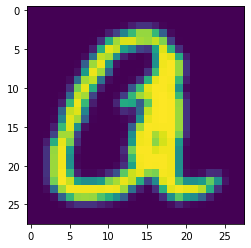

In [60]:
# Your code here

X_low=data[data.e>=36].drop(columns="e")
y_low=data[data.e>=36].e
plt.imshow(data[data.e==36].iloc[0,1:].values.reshape(28,28));

In [61]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low,y_low,test_size=0.2)

In [62]:
SVC.fit(X_low_train,y_low_train)
y_low_pred=SVC.predict(X_low_test)
precision_score(y_low_test,y_low_pred,average=None)
recall_score(y_low_test,y_low_pred,average=None)
f1_score(y_low_test,y_low_pred,average=None)
SVC.score(X=X_low_test,y=y_low_test)

/Users/alanromero/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7866379310344828

In [63]:
DTC.fit(X_low_train,y_low_train)
y_low_pred=DTC.predict(X_low_test)
precision_score(y_low_test,y_low_pred,average=None)
recall_score(y_low_test,y_low_pred,average=None)
f1_score(y_low_test,y_low_pred,average=None)
DTC.score(X=X_low_test,y=y_low_test)

0.5991379310344828

In [64]:
RFC.fit(X_low_train,y_low_train)
y_low_pred=RFC.predict(X_low_test)
precision_score(y_low_test,y_low_pred,average=None)
recall_score(y_low_test,y_low_pred,average=None)
f1_score(y_low_test,y_low_pred,average=None)
RFC.score(X=X_low_test,y=y_low_test)

/Users/alanromero/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7456896551724138

* Try to do the same thing with numbers.

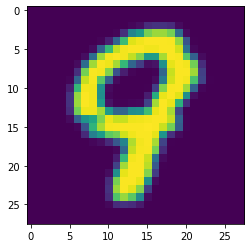

In [65]:
# Your code here

X_num=data[data.e<=9].drop(columns="e")
y_num=data[data.e<=9].e
plt.imshow(data[data.e==9].iloc[0,1:].values.reshape(28,28))

In [66]:
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num,y_num,test_size=0.2)

In [67]:
SVC.fit(X_num_train,y_num_train)
y_num_pred=SVC.predict(X_num_test)
precision_score(y_num_test,y_num_pred,average=None)
recall_score(y_num_test,y_num_pred,average=None)
f1_score(y_num_test,y_num_pred,average=None)
SVC.score(X=X_num_test,y=y_num_test)

0.9641791044776119

In [68]:
DTC.fit(X_num_train,y_num_train)
y_num_pred=DTC.predict(X_num_test)
precision_score(y_num_test,y_num_pred,average=None)
recall_score(y_num_test,y_num_pred,average=None)
DTC.score(X=X_num_test,y=y_num_test)

0.7870646766169154

In [69]:
RFC.fit(X_num_train,y_num_train)
y_num_pred=RFC.predict(X_num_test)
precision_score(y_num_test,y_num_pred,average=None)
recall_score(y_num_test,y_num_pred,average=None)
f1_score(y_num_test,y_num_pred,average=None)
RFC.score(X=X_num_test,y=y_num_test)

0.945273631840796